In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from textblob import TextBlob

In [2]:
# this will take 1-2 minutes
posts_file_path = os.path.join('..', 'data', 'raw', "combined_bigquery_processed.csv")
posts_df = pd.read_csv(posts_file_path)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (2,5,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# should have 10,015,586 rows
print(f"number of rows in data: {len(posts_df)}")

number of rows in data: 10015586


In [5]:
pd.set_option('display.max_columns', None)
posts_df.head()

,selftext,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type
0,"Another one of their smug, preachy ass headlin...",NaN,NaN,NaN,ThisIsTedSpeaking,GA,NaN,1548979405,t5_38unr,t3_alr7qq,t3_alr7qq,3,1552341042,0,0,efhd3oz,The_Donald,NaN,NaN,georgia-us-state,2019-01-31,extant
1,enema has been pretending to be a rapper for y...,NaN,NaN,NaN,mastermeatlock,VA,NaN,1549238712,t5_38unr,t3_amv0ki,t3_amv0ki,9,1553492656,0,0,efownuo,The_Donald,NaN,NaN,virginia,2019-02-03,extant
2,That area from Abilene to border (I-20 to I-10...,NaN,NaN,NaN,txladyvoter,#45,NaN,1549238721,t5_38unr,t3_amr6kj,t1_efo6zai,3,1553492661,0,0,efowo8r,The_Donald,NaN,NaN,MURICA,2019-02-03,extant
3,She's got the politician fist point down,NaN,NaN,NaN,Tdaccount841,SC,NaN,1549152215,t5_38unr,t3_amjtig,t3_amjtig,1,1553452149,0,0,efmhy5u,The_Donald,NaN,NaN,south-carolina,2019-02-02,extant
4,Imagine getting paid to drop three words on a ...,NaN,NaN,NaN,Ask_If_Im_A_Cactus,Кактус,NaN,1549756908,t5_38unr,t3_aoy05c,t3_aoy05c,4,1553983794,0,0,eg4fg9x,The_Donald,NaN,NaN,ivanka,2019-02-09,extant


In [6]:
posts_df.describe()

,score_hidden,name,downs,created_utc,score,retrieved_on,controversiality,gilded,ups
count,0.0,0.0,0.0,1.001559e+07,1.001559e+07,1.001559e+07,1.001559e+07,1.001559e+07,0.0
mean,NaN,NaN,NaN,1.561263e+09,8.982444e+00,1.567742e+09,8.746368e-03,6.030601e-05,NaN
std,NaN,NaN,NaN,9.027785e+06,3.201599e+01,1.113914e+07,9.311214e-02,8.383723e-03,NaN
min,NaN,NaN,NaN,1.546301e+09,-8.200000e+02,1.550713e+09,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,1.553330e+09,1.000000e+00,1.556517e+09,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,NaN,1.561057e+09,3.000000e+00,1.570363e+09,0.000000e+00,0.000000e+00,NaN
75%,NaN,NaN,NaN,1.569009e+09,7.000000e+00,1.577285e+09,0.000000e+00,0.000000e+00,NaN
max,NaN,NaN,NaN,1.577837e+09,5.340000e+03,1.586450e+09,1.000000e+00,8.000000e+00,NaN


In [7]:
posts_df.groupby('post_type')['post_type'].count() #majority are either removed or blank... need to investigate this for sure

post_type
blank          897
deleted     536690
extant     8983413
removed     494586
Name: post_type, dtype: int64

In [8]:
posts_by_date = posts_df.groupby('created_date')['post_type'].value_counts().unstack()
posts_by_date.fillna(0, inplace=True)
posts_by_date.head()

post_type,blank,deleted,extant,removed
created_date,,,,
2018-12-31,0.0,322.0,5272.0,191.0
2019-01-01,0.0,1040.0,18630.0,888.0
2019-01-02,0.0,1223.0,20986.0,946.0
2019-01-03,1.0,1356.0,24190.0,1050.0
2019-01-04,1.0,1695.0,28213.0,1343.0


<AxesSubplot:xlabel='created_date'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


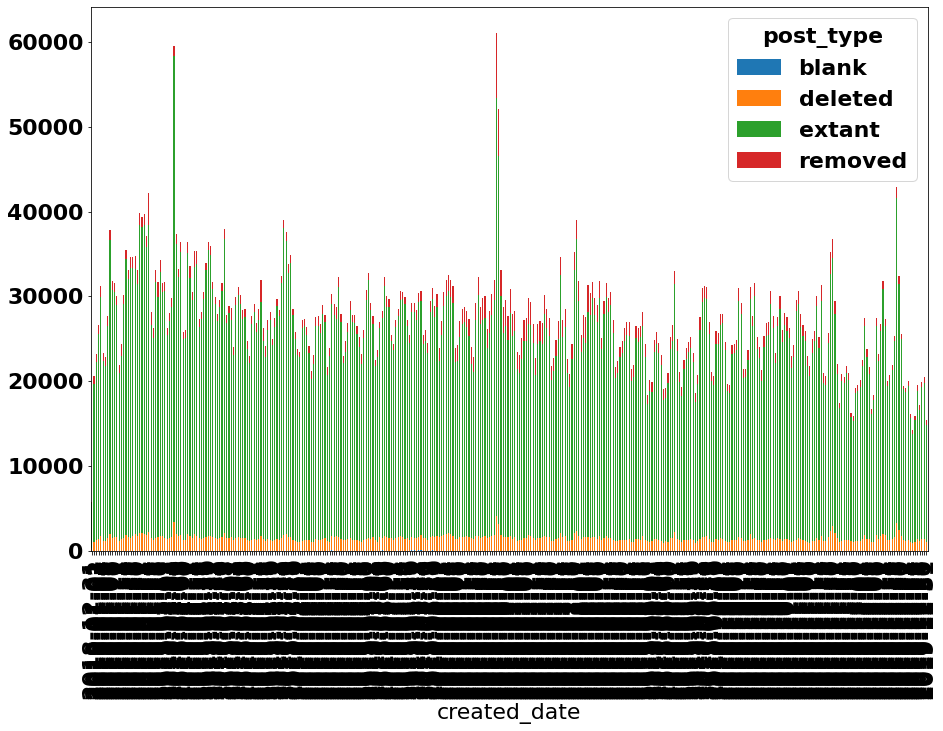

In [9]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (15,10)

posts_by_date.plot(kind='bar', stacked=True)